# Convolutional Neural Network on the Malaria dataset

In [24]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import random

In [25]:
data_root = "cell_images"

data_root = pathlib.Path(data_root)

In [26]:
for item in data_root.iterdir():
    print(item)

cell_images/Parasitized
cell_images/Uninfected


In [27]:
all_image_paths = list(data_root.glob("*/*"))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

In [28]:
image_count = len(all_image_paths)

print(image_count)

27558


In [29]:
label_names = [item.name for item in data_root.glob("*/") if item.is_dir()]

print(label_names)

['Parasitized', 'Uninfected']


In [30]:
label_to_index = dict((name, index) for index, name in enumerate(label_names))

print(label_to_index)

{'Parasitized': 0, 'Uninfected': 1}


In [31]:
all_image_labels = [label_to_index[pathlib.Path(path).parent.name] for path in all_image_paths]

In [32]:
def load_image(path):
    img_raw = tf.io.read_file(path)
    img_tensor = tf.image.decode_png(img_raw)
    img_final = tf.image.resize(img_tensor, [32, 32])
    img_final = img_final/255.0
    return img_final

In [33]:
all_images = tf.stack([load_image(path) for path in all_image_paths])

In [34]:
print(all_images.shape)

(27558, 32, 32, 3)


In [35]:
all_image_labels = tf.stack(all_image_labels)

In [36]:
print(all_image_labels.shape)

(27558,)


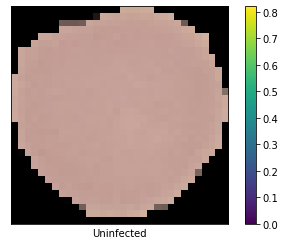

In [37]:
plt.figure()
plt.imshow(all_images[0])
plt.xticks([])
plt.yticks([])
plt.xlabel(label_names[all_image_labels[0]])
plt.colorbar()
plt.show()

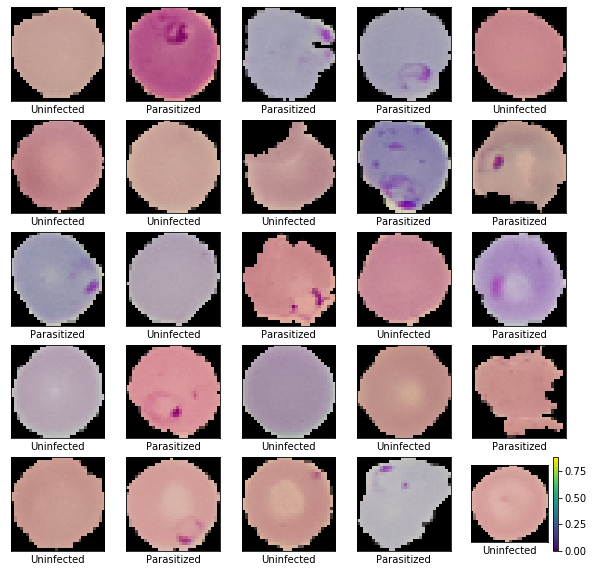

In [38]:
plt.figure(figsize=(10, 10))

for i in range(0, 25):
    plt.subplot(5, 5, i+1)
    plt.imshow(all_images[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(label_names[all_image_labels[i]])
plt.colorbar()
plt.show()

In [39]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation=keras.activations.relu, input_shape=(32, 32, 3)))
model.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation=keras.activations.relu))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation=keras.activations.relu))
model.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation=keras.activations.relu))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation=keras.activations.relu))
model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation=keras.activations.relu))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation=keras.activations.relu))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation=keras.activations.sigmoid))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 32)         

In [40]:
train_images = all_images[:25000]
test_images = all_images[25000:]

train_labels = all_image_labels[:25000]
test_labels = all_image_labels[25000:]

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(25000, 32, 32, 3)
(25000,)
(2558, 32, 32, 3)
(2558,)


In [41]:
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [42]:
model.fit(train_images, train_labels, epochs = 10)

Train on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 102s 4ms/sample - loss: 0.6795 - accuracy: 0.5470
Epoch 2/10
25000/25000 [==============================] - 100s 4ms/sample - loss: 0.2199 - accuracy: 0.9291
Epoch 3/10
25000/25000 [==============================] - 99s 4ms/sample - loss: 0.1544 - accuracy: 0.9541
Epoch 4/10
25000/25000 [==============================] - 100s 4ms/sample - loss: 0.1464 - accuracy: 0.9557
Epoch 5/10
25000/25000 [==============================] - 100s 4ms/sample - loss: 0.1374 - accuracy: 0.9569
Epoch 6/10
25000/25000 [==============================] - 100s 4ms/sample - loss: 0.1315 - accuracy: 0.9583
Epoch 7/10
25000/25000 [==============================] - 100s 4ms/sample - loss: 0.1281 - accuracy: 0.9587
Epoch 8/10
25000/25000 [==============================] - 100s 4ms/sample - loss: 0.1257 - accuracy: 0.9593
Epoch 9/10
25000/25000 [==============================] - 100s 4ms/sample - loss: 0.1222 - accuracy: 0.9597
Epoch 

In [43]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(test_acc)

2558/2558 [==============================] - 2s 930us/sample - loss: 0.1273 - accuracy: 0.9586
0.95856136


[[1.2921437e-05]]


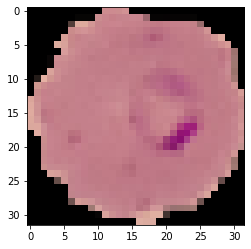

Actual value:  Parasitized
Predicted value:  Parasitized


In [44]:
img = test_images[0]

predictions_single = model.predict(np.expand_dims(img, axis = 0))

print(predictions_single)

plt.figure()
plt.imshow(img)
plt.show()

print("Actual value: ", label_names[test_labels[0]])
print("Predicted value: ", label_names[np.argmax(predictions_single)])